In [1]:
import subtractr
import matplotlib.pyplot as plt
import numpy as np
import circuitmap
from circuitmap.simulation import simulate_continuous_experiment
import subtractr.photocurrent_sim as pcsim
import jax


In [2]:
expt = simulate_continuous_experiment(N=20)

Creating simulation with specifications:
Population size 20
Hologram targets 10
Response window (frames) 900
Stimulus frequency (Hz) 10
Experiment duration (s) 1.00
Sampling frequency (KHz) 20.0
Hologram repetitions 1
Connection density 0.1
Spontaneous PSC rate (Hz) 3
Powers [45, 55, 65]


In [4]:
expt.keys()

dict_keys(['pscs', 'obs_responses', 'true_responses', 'stim_matrix', 'weights', 'spike_matrix', 'stim_times'])

In [26]:
def add_photocurrents_to_expt(key, expt, pc_shape_params=None, frac_pc_cells=0.1, opsin_mean=0.5, opsin_std=0.2, stim_start=0.0, stim_end=5.0, pc_response_var=0.1):
    """Add photocurrents to a continuous experiment"""

    N = len(expt['weights'])
    pc_cells = np.random.choice(N, int(frac_pc_cells*N), replace=False)
    opsin_expression = np.zeros(N)
    opsin_expression[pc_cells] = np.random.gamma(shape=(opsin_mean/opsin_std)**2, scale=opsin_std**2/opsin_mean, size=len(pc_cells))


    if pc_shape_params is None:
        pc_shape_params = dict(
            O_inf_min=0.3,
                O_inf_max=1.0,
                R_inf_min=0.1,
                R_inf_max=1.0,
                tau_o_min=3,
                tau_o_max=30,
                tau_r_min=3,
                tau_r_max=30, 
            )

    pc_full_params = dict(
        onset_jitter_ms=1.0,
        onset_latency_ms=0.0,
        pc_shape_params=pc_shape_params,
        add_target_gp=False,
        target_gp_lengthscale=20,
        target_gp_scale=0.01,
        linear_onset_frac=1.0,
        msecs_per_sample=0.05,
        stim_start=0.0,
        stim_end=5.0,
        isi_ms=30,
        window_len_ms=200,
    )

    pscs = np.array(expt['pscs'])
    num_stims = len(expt['stim_times'])
    jittered_pc_shapes = pcsim.sample_jittered_photocurrent_shapes(key, num_stims, **pc_full_params)[1]
    i = 0
    for cell_idx in pc_cells:
        stims_this_cell = np.where(expt['stim_matrix'][cell_idx, :])[0]
        stim_times_this_cell = expt['stim_times'][stims_this_cell]

        # assign random pc amplitudes centered around opsin expression
        pc_amplitudes = np.sqrt(0.1) * np.random.randn(len(stims_this_cell)) + opsin_expression[cell_idx]
        pc_amplitudes = np.maximum(pc_amplitudes, 0.0)

        for j, st in enumerate(stim_times_this_cell):
            pscs[st:st+jittered_pc_shapes.shape[1]] += jittered_pc_shapes[i] * pc_amplitudes[j]
            i += 1

    plt.plot(pscs)


(8, 4000)
(4,)
4200
(8, 4000)
(4,)
8200
(8, 4000)
(4,)
12200
(8, 4000)
(4,)
14200
(8, 4000)
(4,)
2200
(8, 4000)
(4,)
4200
(8, 4000)
(4,)
12200
(8, 4000)
(4,)
14200
(8, 4000)
(4,)
2200
(8, 4000)
(4,)
4200
(8, 4000)
(4,)
12200
(8, 4000)
(4,)
14200
(8, 4000)
(4,)
6200
(8, 4000)
(4,)
8200
(8, 4000)
(4,)
10200
(8, 4000)
(4,)
16200
(8, 4000)
(4,)
2200
(8, 4000)
(4,)
6200
(8, 4000)
(4,)
10200
(8, 4000)
(4,)
16200
(8, 4000)
(4,)
6200
(8, 4000)
(4,)
8200
(8, 4000)
(4,)
10200
(8, 4000)
(4,)
16200
(8, 4000)
(4,)
2200
(8, 4000)
(4,)
4200
(8, 4000)
(4,)
12200
(8, 4000)
(4,)
14200
(8, 4000)
(4,)
2200
(8, 4000)
(4,)
6200
(8, 4000)
(4,)
10200
(8, 4000)
(4,)
16200
(8, 4000)
(4,)
4200
(8, 4000)
(4,)
8200
(8, 4000)
(4,)
12200
(8, 4000)
(4,)
14200
(8, 4000)
(4,)
6200
(8, 4000)
(4,)
8200
(8, 4000)
(4,)
10200
(8, 4000)
(4,)
16200


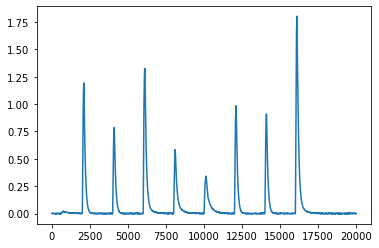

In [28]:
key = jax.random.PRNGKey(1)
add_photocurrents_to_expt(key, expt, frac_pc_cells=0.5, opsin_mean=0.1, opsin_std=0.1)

In [6]:
expt['stim_times']

array([ 2000,  4000,  6000,  8000, 10000, 12000, 14000, 16000])

In [29]:
expt.keys()

dict_keys(['pscs', 'obs_responses', 'true_responses', 'stim_matrix', 'weights', 'spike_matrix'])